# 수행목표
- KMRD 데이터를 기반으로 랜덤으로 추천하는 기능을 개발한다.
# 수행단계
- 데이터를 load() 하고 전처리하는 class는 `MovieDataLoader로` 하고 생성 시 입력 파라미터는 file 경로로 하여 로드 후 결과로 데이터를 return 한다.
- 추천 코드 class 명을 `RandomRecommender로` 한다.
- 데이터 파일은 평점(rates.csv)과 영화(movies.txt)만 사용한다.
- 추천을 실행하는 함수는 `run()` 으로 하고 실행 완료 후 결과에 random 평점 field(`rate_random`)를 추가하고 random 값을 반영해서 결과를 return 한다.
- 결과 데이터 평점 높은 순 n개를 출력한다.

In [1]:
# Library

import os
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
# Data

movies = pd.read_csv('data/kmrd/movies.txt', sep='\t')
rates = pd.read_csv('data/kmrd/rates.csv')
genres = pd.read_csv('data/kmrd/genres.csv')
castings = pd.read_csv('data/kmrd/castings.csv')
poeples = pd.read_csv('data/kmrd/peoples.txt', sep='\t')
countries = pd.read_csv('data/kmrd/countries.csv')

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      999 non-null    int64  
 1   title      992 non-null    object 
 2   title_eng  991 non-null    object 
 3   year       609 non-null    float64
 4   grade      957 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB


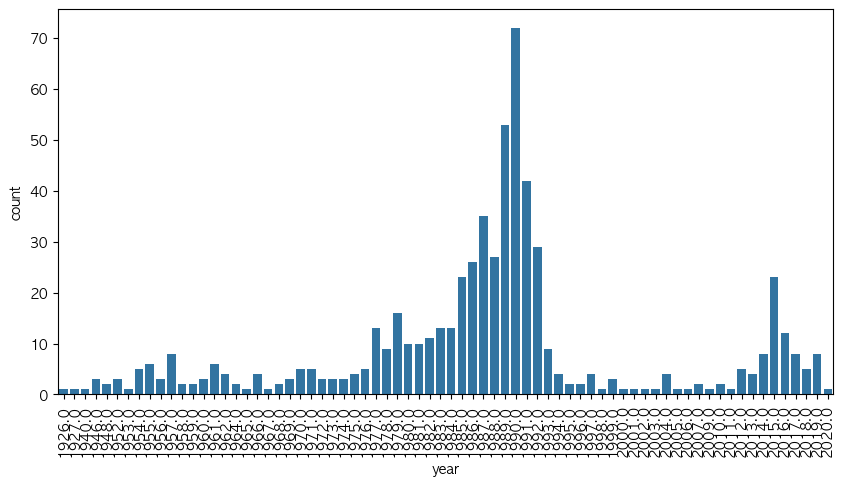

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(data=movies, x='year', ax=ax)
plt.xticks(rotation=90)

plt.show()

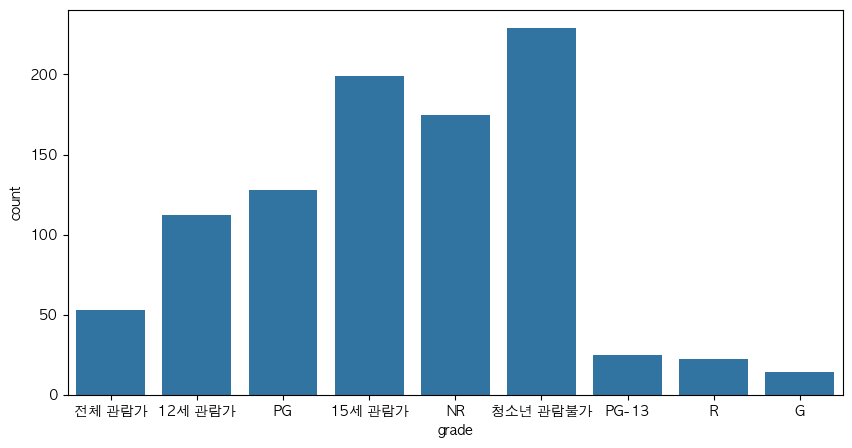

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.countplot(data=movies, x='grade', ax=ax)

plt.show()

In [6]:
non_title = movies[movies['title_eng'].isnull()]
non_title

,movie,title,title_eng,year,grade
197,10198,호소자 7 - 격투기 챔피언 아강,NaN,NaN,NR
326,10327,NaN,NaN,NaN,NaN
474,10475,NaN,NaN,NaN,NaN
671,10672,NaN,NaN,NaN,NaN
706,10707,NaN,NaN,NaN,NaN
792,10793,NaN,NaN,NaN,NaN
956,10957,NaN,NaN,NaN,NaN
989,10990,NaN,NaN,NaN,NaN


In [7]:
movies.dropna(subset=['title_eng'], inplace=True)

movies

,movie,title,title_eng,year,grade
0,10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
1,10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
2,10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
3,10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
4,10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG
...,...,...,...,...,...
994,10995,공포의 여정,"Journey Into Fear , 1975",NaN,PG
995,10996,버스틴 루즈,"Bustin' Loose , 1981",NaN,R
996,10997,블랙 엔젤,"Mausoleum , 1983",NaN,청소년 관람불가
997,10998,폭주 기관차,"Runaway Train , 1985",1989.0,15세 관람가


In [8]:
non_year = movies[movies['year'].isnull()]
non_year

,movie,title,title_eng,year,grade
9,10010,슈퍼맨 3,"Superman III , 1983",NaN,전체 관람가
30,10031,죠스 3,"Jaws 3-D , 1983",NaN,15세 관람가
31,10032,죠스 4,"Jaws: The Revenge , 1987",NaN,PG-13
50,10051,싸이코 2,"Psycho II , 1983",NaN,청소년 관람불가
51,10052,싸이코 3,"Psycho III , 1986",NaN,청소년 관람불가
...,...,...,...,...,...
992,10993,톰 혼,"Tom Horn , 1980",NaN,R
994,10995,공포의 여정,"Journey Into Fear , 1975",NaN,PG
995,10996,버스틴 루즈,"Bustin' Loose , 1981",NaN,R
996,10997,블랙 엔젤,"Mausoleum , 1983",NaN,청소년 관람불가


In [9]:
# ','를 제목에 포함한 영화

sample = non_year[non_year['title_eng'].str.contains(',')]
sample

,movie,title,title_eng,year,grade
9,10010,슈퍼맨 3,"Superman III , 1983",NaN,전체 관람가
30,10031,죠스 3,"Jaws 3-D , 1983",NaN,15세 관람가
31,10032,죠스 4,"Jaws: The Revenge , 1987",NaN,PG-13
50,10051,싸이코 2,"Psycho II , 1983",NaN,청소년 관람불가
51,10052,싸이코 3,"Psycho III , 1986",NaN,청소년 관람불가
...,...,...,...,...,...
992,10993,톰 혼,"Tom Horn , 1980",NaN,R
994,10995,공포의 여정,"Journey Into Fear , 1975",NaN,PG
995,10996,버스틴 루즈,"Bustin' Loose , 1981",NaN,R
996,10997,블랙 엔젤,"Mausoleum , 1983",NaN,청소년 관람불가


In [10]:
for row in non_year.iterrows():
    movie = row[1]['movie']
    title_eng = row[1]['title_eng'].split(' , ')[:-1]
    year = row[1]['title_eng'].split(', ')[-1]
    print(movie, title_eng, year)
    # movies.loc[movies['movie'] == movie, 'title_eng'] = title_eng
    # movies.loc[movies['movie'] == movie, 'year'] = year

10010 ['Superman III'] 1983
10031 ['Jaws 3-D'] 1983
10032 ['Jaws: The Revenge'] 1987
10051 ['Psycho II'] 1983
10052 ['Psycho III'] 1986
10060 ['Mr. Smith Goes To Washington'] 1939
10074 ['Star Trek: The Motion Picture'] 1979
10075 ['Star Trek II: The Wrath Of Khan'] 1982
10076 ['Star Trek III: The Search For Spock'] 1984
10077 ['Star Trek IV: The Voyage Home'] 1986
10078 ['Star Trek V: The Final Frontier'] 1989
10079 ['Star Trek VI: The Undiscovered Country'] 1991
10083 ['Police Academy 4: Citizens On Patrol'] 1987
10084 ['Police Academy 5: Assignment Miami Beach'] 1988
10085 ['Police Academy 6: City Under Siege'] 1989
10091 ['A Bout De Souffle', 'Breathless'] 1959
10097 ['Good Morning, Vietnam'] 1987
10098 ['Footloose'] 1984
10108 ['Grease 2'] 1982
10122 ['Twilight'] 1998
10123 ['...Continuavano A Chiamarlo Trinita', 'Trinity Is Still My Name!'] 1972
10124 ['Airplane!'] 1980
10125 ['Airplane II: The Sequel'] 1982
10129 ['Caddyshack'] 1980
10135 ['Chinatown'] 1974
10136 ['Paradise'] 19

In [11]:
non_grade = movies[movies['grade'].isnull()]
non_grade

,movie,title,title_eng,year,grade
175,10176,남과 북,"North And South , 1985",1985.0,NaN
176,10177,남과 북 2,"North And South II , 1986",1986.0,NaN
179,10180,대통령을 만드는 사람들,"Favorite Son , 1988",1988.0,NaN
204,10205,그날 이후,"The Day After , 1983",NaN,NaN
293,10294,브이 - 5부작 미니시리즈,"V , 1983",1983.0,NaN
347,10348,벨테네브로스,"Beltenebros , Prince Of Shadows , 1991",NaN,NaN
360,10361,서부 전선 이상 없다,"All Quiet On The Western Front , 1930",NaN,NaN
371,10372,빗나간 모정,"Wife, Mother, Murderer: The Marie Hilley Story...",NaN,NaN
406,10407,선샤인,"Sunshine , 1973",1978.0,NaN
429,10430,역마차,"Stagecoach , 1939",1952.0,NaN


In [12]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140710 entries, 0 to 140709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    140710 non-null  int64
 1   movie   140710 non-null  int64
 2   rate    140710 non-null  int64
 3   time    140710 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB


In [13]:
class MovieDataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        movie_path = os.path.join(self.file_path, 'movies.txt')
        rate_path = os.path.join(self.file_path, 'rates.csv')
        self.movies = pd.read_csv(movie_path, sep='\t')
        self.rates = pd.read_csv(rate_path)

    def load(self):
        self._preprocess()

        return self.movies, self.rates

    def _preprocess(self):
        self.movies.dropna(subset=['title_eng'], inplace=True)

        if self.movies['year'].isnull().sum() > 0:
            non_year = self.movies[self.movies['year'].isnull()]
            for row in non_year.iterrows():
                movie = row[1]['movie']
                title_eng = row[1]['title_eng'].split(' , ')[:-1]
                title_eng = ' , '.join(title_eng)
                year = row[1]['title_eng'].split(' , ')[-1]
                self.movies.loc[self.movies['movie'] == movie, 'title_eng'] = title_eng
                self.movies.loc[self.movies['movie'] == movie, 'year'] = year

        if self.movies['grade'].isnull().sum() > 0:
            self.movies['grade'] = self.movies['grade'].fillna('NR grade')



In [14]:
movies_df, rates_df = MovieDataLoader('data/kmrd/').load()

movies_df.info(), rates_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   movie      991 non-null    int64 
 1   title      991 non-null    object
 2   title_eng  991 non-null    object
 3   year       991 non-null    object
 4   grade      991 non-null    object
dtypes: int64(1), object(4)
memory usage: 46.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140710 entries, 0 to 140709
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   user    140710 non-null  int64
 1   movie   140710 non-null  int64
 2   rate    140710 non-null  int64
 3   time    140710 non-null  int64
dtypes: int64(4)
memory usage: 4.3 MB


/var/folders/ph/w9kxghkd5959cwdbzq0m7_9m0000gn/T/ipykernel_52429/2801200881.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1983' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.movies.loc[self.movies['movie'] == movie, 'year'] = year


(None, None)

In [15]:
# 결과에 random 평점 field(rate_random)를 추가하고 random 값을 반영해서 결과를 return 한다.

class RandomRecommender:
    def __init__(self, movies_df, rates_df):
        self.movies_df = movies_df
        self.rates_df = rates_df

    def run(self, user_id, n_items=10):
        user_rates = self.rates_df[self.rates_df['user'] == user_id]
        rate_random = np.random.rand(len(user_rates)) * 10
        user_rates['rate_random'] = rate_random
        user_rates = user_rates.sort_values(by='rate_random', ascending=False)
        user_rates = user_rates.head(n_items)

        return user_rates

In [16]:
result = RandomRecommender(movies_df, rates_df).run(0, 10)
result

/var/folders/ph/w9kxghkd5959cwdbzq0m7_9m0000gn/T/ipykernel_52429/1989027225.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_rates['rate_random'] = rate_random


,user,movie,rate,time,rate_random
25,0,10096,5,1427543880,9.974800
47,0,10286,7,1432448460,9.948254
59,0,10489,9,1426164480,9.873849
63,0,10514,8,1462067280,9.627287
5,0,10023,7,1428738480,9.563008
53,0,10399,7,1494658920,9.538820
33,0,10132,9,1403325360,9.444683
84,0,10980,7,1452516180,9.285889
22,0,10087,6,1455366120,9.268314
39,0,10204,7,1411430520,9.038525
